In [290]:
import seaborn as sn
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
df = pd.read_csv('train.csv') #Data is read from file.
#print(df)
#df.info() #Whether the file read operation was successful or not and the file information was checked and libraries added.

In [272]:
result1 = df.tail(6) #Q1 df.loc[885:890] #Information of the last 6 passengers is showed. 
print(result1)

     PassengerId  Survived  Pclass                                      Name  \
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket    Fare Cabin Embarked  
885  female  39.0      0      5      382652  29.125   NaN        Q  
886    male  27.0      0      0      211536  13.000   NaN        S  
887  female  19.0      0      0      112053  30.000   B42        S  
888  female   NaN      1      2  W./C. 6607  23.450   NaN        S  
889    male  26.0      0      0      111369  30.000  C148        C  
890    male  32.0      0 

In [273]:
print(df.columns) # Q2 column headers is sorted 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [274]:
print(df.shape) # Q3 The size of the data structure is shown.The number of passengers and the categories were determined.. 

(891, 12)


In [275]:
df.info() # Q4 With the info() method, information was obtained about the columns with missing data.
print(df.isnull().sum().sort_values(ascending=False)) #he number of missing data was calculated for each column .
# It was determined that there were 687 missing data in the cabin category, 177 in the age category and 2 in the embarked category

#df = df.dropna()

#missing data has been deleted. ÖDEV KAĞIDINDA SİLME İŞLEMİ KESİN BİR ŞEKİLDE BELİRTİLMEDİĞİ İÇİN EKSİK VERİLERİ 
#SİLMEDİM. EKSİK VERİLERİ SİLME FONKSİYONUNU GÖRMEK İSTERSİNİZ DİYE BURAYA BIRAKIYORUM. 


print(df.isnull().sum().sort_values(ascending=False))     #IF DELETION FUNCTION USES, TO SEE THE CURRENT STATE OF THE DATA...
df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
Cab

In [276]:
df["Pclass"].value_counts()  # Q5 Calculated the number of elements of the classes inside the Pclass.
                             #It was determined that the maximum number of passengers was in the 3rd class, minimum 
                             #number of passengers in the 2nd class . 
                             

3    491
1    216
2    184
Name: Pclass, dtype: int64

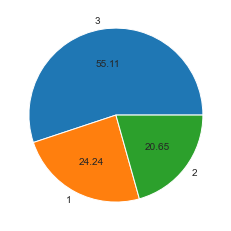

In [277]:
mylabels = ["3", "1", "2"]  #Percentage was calculated according to the obtained data. continue of Q5
plt.pie(df["Pclass"].value_counts(), labels = mylabels, autopct='%.2f')
plt.show()


<BarContainer object of 2 artists>

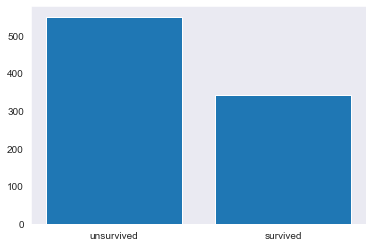

In [278]:
y = df["Survived"].value_counts()      # Q6 
mylabels = ["unsurvived", "survived"]  #Calculated based on the data obtained. 
                                       #It was determined that the number of unsurvived was more than the number of survived.
plt.bar(mylabels,y)


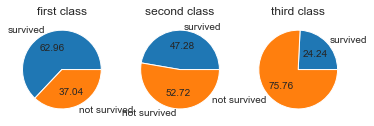

In [279]:
group_by_class = df.groupby('Pclass') # Q7 Calculated survival percentages by passenger class. 
survived = group_by_class['Survived'].sum()
sum_class = group_by_class.size()

fig, axis = plt.subplots(1,3)
myLabels = ["survived", "not survived"]
titles = ["first class", "second class", "third class"]
for cnt in [0,1,2]:
    
    axis[cnt].pie([survived[cnt+1], sum_class[cnt+1]-survived[cnt+1]],labels=myLabels, autopct='%.2f', radius=1)
    axis[cnt].set_title(titles[cnt])
    

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

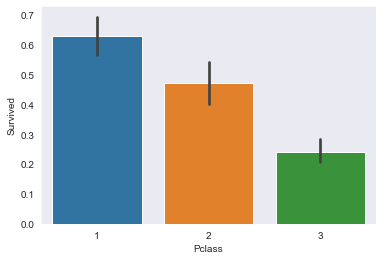

In [280]:
sn.barplot(x='Pclass', y='Survived', data=df) #  Q8 survival percentages of classes
#It was seen that the class with the highest survival rate was 1, and the class with the least was 3. 
# The reason for this is thought to be the priority given to 1st class passengers when the ship is sinking.

In [281]:
pd.crosstab(df.Sex,df.Survived,margins=True)# Q9 According to the diagram, the number of women surviving is higher than the 
 # number of men, and was seen that the number of men who lost their lives was higher than the number of women.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


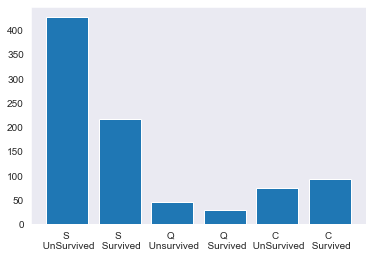

In [282]:
south = len(df[(df['Embarked'] == 'S') & (df['Survived'] == 0)] )  #Q10 graph of living and non-living people by boarding place
south1 = len(df[(df['Embarked'] == 'S') & (df['Survived'] == 1)] )

queen = len(df[(df['Embarked'] == 'Q') & (df['Survived'] == 0)] )
queen1 = len(df[(df['Embarked'] == 'Q') & (df['Survived'] == 1)] )

cher = len(df[(df['Embarked'] == 'C') & (df['Survived'] == 0)] )
cher1 = len(df[(df['Embarked'] == 'C') & (df['Survived'] == 1)] )

x=["S \n UnSurvived","S \n Survived","Q \n Unsurvived","Q \n  Survived","C \n UnSurvived","C \n Survived"]
h=[south,south1,queen,queen1,cher,cher1]
plt.bar(x,h)
plt.show()

In [283]:
for x in df["Age"]: #Q11 It was determined that the highest number of survivors was from the adult group, and the least
    #number of survivors was from the elderly group.t is thought that the rate is high due to the fact that adult people 
    #can protect themselves better.
    if x<=18:
        df["Age"].replace({x:"child"},inplace=True)
    elif 18<x<60:
         df["Age"].replace({x:"adult"},inplace=True)
    elif x>=60:
         df["Age"].replace({x:"old"},inplace=True)
pd.crosstab([df.Sex,df.Survived],df.Age,margins=True)

Age              adult  child  old  All
Sex    Survived                        
female 0            42     22    0   64
       1           147     46    4  197
male   0           294     47   19  360
       1            66     24    3   93
All                549    139   26  714

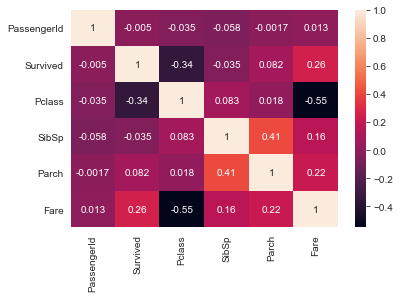

In [284]:
sn.heatmap(df.corr(), annot=True)  #Q12 heatmap for correlation between whether a passenger survived 
plt.show()

In [285]:
train_test_data = [df] # Q13 The most used title is detected

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#df['Title'].value_counts()
print("THE MOST COMMONLY USED TITLE IS: "+ df['Title'].head(1))


0    THE MOST COMMONLY USED TITLE IS: Mr
Name: Title, dtype: object


In [286]:
train_test_data = [df]  #Q14 Calculated how many titles there are in total.

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Kullanılan toplam title çeşidi :")
len(df['Title'].value_counts())




Kullanılan toplam title çeşidi :


17

In [297]:
train_test_data = [df]  #Q14 Title types is sorted.

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Kullanılan toplam title çeşidi :")
df['Title'].value_counts()

Kullanılan toplam title çeşidi :


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Lady          1
Jonkheer      1
Capt          1
Don           1
Sir           1
Ms            1
Mme           1
Name: Title, dtype: int64

In [298]:
df["Age"].mean() #Q15 The average age of passengers is calculated. If there is any mistake here because of Jupyter, please 
# jump to line 1,after that go back here


29.69911764705882

<AxesSubplot:xlabel='Survived', ylabel='Age'>

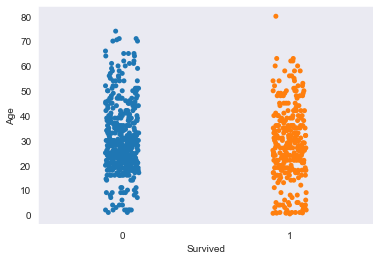

In [299]:
sn.stripplot(x="Survived", y="Age", data=df, jitter = True) #Q16  strip chart that plots age (y-axis),and survival (x-axis).

In [300]:
df[(df['Age']==df['Age'].max()) & (df['Survived'] == 1)]  #Q17 The age of the oldest person who survived is calculated.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,Mr


([<matplotlib.patches.Wedge at 0x20ca85ee340>,
 [Text(0.7985950521056507, 0.7564693931365453, 'child'),
  Text(-0.8536092999603789, -0.6937947556887065, 'adult'),
  Text(1.0968387833757207, -0.0833347663515582, 'old')],
 [Text(0.43559730114853673, 0.4126196689835701, '24.14'),
  Text(-0.4656050727056612, -0.37843350310293083, '73.45'),
  Text(0.5982757000231204, -0.04545532710084993, '2.41')])

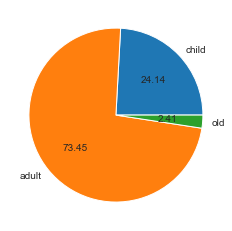

In [301]:
child=len(df[(df['Age'] >= 0) & (df['Age'] <= 18) & (df['Survived'] == 1)] ) #Q18
#pie chart that shows the percentage of people who survived according to the age group
adult=len(df[(df['Age'] > 18) & (df['Age'] < 60) & (df['Survived'] == 1)] )
old=len(df[(df['Age'] >= 60) & (df['Survived'] == 1)] )
mylabels = ["child", "adult", "old"] 
y = np.array([child,adult,old])
plt.pie(y, labels = mylabels, autopct='%.2f')


([<matplotlib.patches.Wedge at 0x20ca8c514c0>,
 [Text(0.9593470995991411, 0.5381943352458439, 'veled'),
  Text(-1.025372701559712, -0.39825974300214906, 'ortaYasSendromu'),
  Text(1.0891176863224272, -0.1543459275124658, 'moruk')],
 [Text(0.523280236144986, 0.29356054649773305, '16.27'),
  Text(-0.559294200850752, -0.2172325870920813, '79.25'),
  Text(0.5940641925395057, -0.08418868773407225, '4.48')])

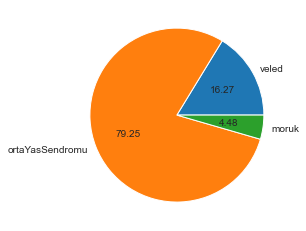

In [302]:
veled = len(df[(df['Age'] >= 0) & (df['Age'] <= 18) & (df['Survived'] == 0)] ) #Q19
##pie chart that shows the percentage of people who did not survived according to the age group
ortaYasSendromu= len(df[(df['Age'] > 18) & (df['Age'] < 60) & (df['Survived'] == 0)] ) #Q19
moruk = len(df[(df['Age'] >= 60) & (df['Survived'] == 0)] ) #Q19
myLabels = ["veled", "ortaYasSendromu","moruk"]
plt.pie([veled,ortaYasSendromu,moruk],labels=myLabels, autopct='%.2f', radius=1) #Q19

In [303]:
df['SibSp'].max() #Q20 the number of the siblings of the passenger who has the highest number of siblings

8